# **Stock Market Analytics VN30**

**Thành viên :** 
* Lê Huy Hoàng ( 19110319 )
* Đỗ Hữu Quân ( 19110160 )
* Võ Huyền Bảo Hân ( 19110303 )
* Vòng Vĩnh Phú ( 19110413 )

In [ ]:
!git clone https://github.com/phamdinhkhanh/vnquant


Cloning into 'vnquant'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 186 (delta 0), reused 0 (delta 0), pack-reused 185
Receiving objects: 100% (186/186), 1.01 MiB | 10.99 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [ ]:
%cd vnquant
!python setup.py install

/content/vnquant
running install
running bdist_egg
running egg_info
writing vnquant.egg-info/PKG-INFO
writing dependency_links to vnquant.egg-info/dependency_links.txt
writing requirements to vnquant.egg-info/requires.txt
writing top-level names to vnquant.egg-info/top_level.txt
writing manifest file 'vnquant.egg-info/SOURCES.txt'
writing manifest file 'vnquant.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying vnquant/DataLoader.py -> build/lib/vnquant
copying vnquant/Plot.py -> build/lib/vnquant
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/vnquant
copying build/lib/vnquant/DataLoader.py -> build/bdist.linux-x86_64/egg/vnquant
copying build/lib/vnquant/utils.py -> build/bdist.linux-x86_64/egg/vnquant
copying build/lib/vnquant/Plot.py -> build/bdist.linux-x86_64/egg/vnquant
copying build/lib/vnquant/__init__.py -> build/bdist.linux-x86_64/egg/vnquant


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vnquant.DataLoader as web
import bs4 as bs
import requests

In [ ]:
stocks = ['ACB','BID','BVH','CTG','FPT','GAS',
            'GVR','HDB','HPG','KDH','MBB','MSN',
            'MWG','NVL','PDR','PLX','PNJ',
            'POW','SAB','SSI','STB','TCB','TPB','VCB',
            'VHM','VIC','VJC','VNM','VPB','VRE']

In [ ]:
loader = web.DataLoader(symbols=stocks,start="2021-03-15",end="2022-03-15",minimal=True,data_source='cafe')
data = loader.download()

/content/vnquant/vnquant/DataLoader.py:254: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  stock_data['change_perc1'], stock_data['change_perc2'] = stock_data['change_perc'].apply(utils.split_change_col).str
2022-03-19 16:08:26,435 : INFO : data ACB from 2021-03-15 to 2022-03-15 have already cloned!
2022-03-19 16:08:35,099 : INFO : data BID from 2021-03-15 to 2022-03-15 have already cloned!
2022-03-19 16:08:43,288 : INFO : data BVH from 2021-03-15 to 2022-03-15 have already cloned!
2022-03-19 16:08:51,564 : INFO : data CTG from 2021-03-15 to 2022-03-15 have already cloned!
2022-03-19 16:08:59,720 : INFO : data FPT from 2021-03-15 to 2022-03-15 have already cloned!
2022-03-19 16:09:07,784 : INFO : data GAS from 2021-03-15 to 2022-03-15 have already cloned!
2022-03-19 16:09:15,623 : INFO : data GVR from 2021-03-15 to 2022-03-15 have already cloned!
2022-03-19 16:09:23,619 : INFO : data HDB from 2021-03-15 to 2022-03-15 have already cloned!
2022

In [ ]:
close_column = [col for col in data.columns if 'close' in col]
data[close_column]

Attributes  close                                                        \
Symbols       ACB    BID   BVH    CTG   FPT    GAS    GVR    HDB    HPG   
date                                                                      
2021-03-15  33.50  43.00  60.1  38.00  76.5   91.1  30.30  26.65  46.50   
2021-03-16  33.45  42.40  59.6  37.70  81.0   90.3  29.45  26.80  46.10   
2021-03-17  33.50  43.30  59.6  39.55  80.8   92.8  29.70  27.50  46.30   
2021-03-18  33.95  45.00  60.7  40.50  81.0   91.8  30.70  27.50  46.60   
2021-03-19  33.80  45.00  61.0  40.45  79.8   90.9  30.00  27.15  47.15   
...           ...    ...   ...    ...   ...    ...    ...    ...    ...   
2022-03-09  32.70  40.50  56.4  32.00  95.5  122.2  36.00  27.00  49.85   
2022-03-10  32.90  40.95  57.4  32.10  94.6  118.5  35.55  26.95  49.15   
2022-03-11  32.70  41.85  57.0  32.25  93.2  112.9  34.50  27.30  47.60   
2022-03-14  32.70  41.30  55.1  31.90  91.8  106.0  33.35  27.10  45.80   
2022-03-15  32.80  42.10  55.1  31.95  91.0  108.0  33.85  27.20  46.15   

Attributes         ...                                                        \
Symbols       KDH  ...    STB    TCB    TPB   VCB   VHM    VIC    VJC    VNM   
date               ...                                                         
2021-03-15  31.35  ...  18.90  40.10  28.70  96.3  99.8  106.0  135.0  102.2   
2021-03-16  31.25  ...  18.90  39.85  28.50  95.7  99.5  105.4  134.6  101.0   
2021-03-17  31.50  ...  19.60  40.30  28.70  95.6  99.3  104.7  133.5  100.5   
2021-03-18  32.20  ...  19.70  41.95  29.00  97.5  99.7  106.6  134.9  102.5   
2021-03-19  32.45  ...  19.60  42.00  28.90  94.2  97.8  108.4  130.5  101.7   
...           ...  ...    ...    ...    ...   ...   ...    ...    ...    ...   
2022-03-09  51.20  ...  31.10  49.10  38.80  83.0  74.0   78.0  140.0   75.1   
2022-03-10  51.50  ...  31.55  49.25  39.00  83.5  75.2   79.1  139.0   77.1   
2022-03-11  51.00  ...  32.05  48.90  38.65  83.8  75.0   79.0  138.5   78.0   
2022-03-14  50.20  ...  32.50  48.50  39.20  84.2  74.5   78.3  145.0   77.2   
2022-03-15  50.00  ...  32.70  48.60  39.90  81.1  74.5   78.3  148.0   77.2   

Attributes                
Symbols       VPB    VRE  
date                      
2021-03-15  44.80  34.45  
2021-03-16  44.35  34.80  
2021-03-17  44.60  34.85  
2021-03-18  45.85  35.00  
2021-03-19  45.20  34.00  
...           ...    ...  
2022-03-09  36.85  31.60  
2022-03-10  36.75  32.00  
2022-03-11  36.40  31.85  
2022-03-14  36.00  32.00  
2022-03-15  36.90  31.75  

[251 rows x 30 columns]

In [ ]:
closePrice = data[close_column]
closePrice.shape

(251, 30)

In [ ]:
profit =  (closePrice / closePrice.shift(1) ) - 1
profit

Attributes     close                                                    \
Symbols          ACB       BID       BVH       CTG       FPT       GAS   
date                                                                     
2021-03-15       NaN       NaN       NaN       NaN       NaN       NaN   
2021-03-16 -0.001493 -0.013953 -0.008319 -0.007895  0.058824 -0.008782   
2021-03-17  0.001495  0.021226  0.000000  0.049072 -0.002469  0.027685   
2021-03-18  0.013433  0.039261  0.018456  0.024020  0.002475 -0.010776   
2021-03-19 -0.004418  0.000000  0.004942 -0.001235 -0.014815 -0.009804   
...              ...       ...       ...       ...       ...       ...   
2022-03-09  0.003067 -0.026442 -0.034247 -0.001560  0.007384  0.012428   
2022-03-10  0.006116  0.011111  0.017730  0.003125 -0.009424 -0.030278   
2022-03-11 -0.006079  0.021978 -0.006969  0.004673 -0.014799 -0.047257   
2022-03-14  0.000000 -0.013142 -0.033333 -0.010853 -0.015021 -0.061116   
2022-03-15  0.003058  0.019370  0.000000  0.001567 -0.008715  0.018868   

Attributes                                          ...                      \
Symbols          GVR       HDB       HPG       KDH  ...       STB       TCB   
date                                                ...                       
2021-03-15       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2021-03-16 -0.028053  0.005629 -0.008602 -0.003190  ...  0.000000 -0.006234   
2021-03-17  0.008489  0.026119  0.004338  0.008000  ...  0.037037  0.011292   
2021-03-18  0.033670  0.000000  0.006479  0.022222  ...  0.005102  0.040943   
2021-03-19 -0.022801 -0.012727  0.011803  0.007764  ... -0.005076  0.001192   
...              ...       ...       ...       ...  ...       ...       ...   
2022-03-09 -0.008264 -0.012797  0.008089 -0.017274  ...  0.008104  0.002041   
2022-03-10 -0.012500 -0.001852 -0.014042  0.005859  ...  0.014469  0.003055   
2022-03-11 -0.029536  0.012987 -0.031536 -0.009709  ...  0.015848 -0.007107   
2022-03-14 -0.033333 -0.007326 -0.037815 -0.015686  ...  0.014041 -0.008180   
2022-03-15  0.014993  0.003690  0.007642 -0.003984  ...  0.006154  0.002062   

Attributes                                                              \
Symbols          TPB       VCB       VHM       VIC       VJC       VNM   
date                                                                     
2021-03-15       NaN       NaN       NaN       NaN       NaN       NaN   
2021-03-16 -0.006969 -0.006231 -0.003006 -0.005660 -0.002963 -0.011742   
2021-03-17  0.007018 -0.001045 -0.002010 -0.006641 -0.008172 -0.004950   
2021-03-18  0.010453  0.019874  0.004028  0.018147  0.010487  0.019900   
2021-03-19 -0.003448 -0.033846 -0.019057  0.016886 -0.032617 -0.007805   
...              ...       ...       ...       ...       ...       ...   
2022-03-09  0.000000  0.018405 -0.008043  0.001284  0.021898 -0.013141   
2022-03-10  0.005155  0.006024  0.016216  0.014103 -0.007143  0.026631   
2022-03-11 -0.008974  0.003593 -0.002660 -0.001264 -0.003597  0.011673   
2022-03-14  0.014230  0.004773 -0.006667 -0.008861  0.046931 -0.010256   
2022-03-15  0.017857 -0.036817  0.000000  0.000000  0.020690  0.000000   

Attributes                      
Symbols          VPB       VRE  
date                            
2021-03-15       NaN       NaN  
2021-03-16 -0.010045  0.010160  
2021-03-17  0.005637  0.001437  
2021-03-18  0.028027  0.004304  
2021-03-19 -0.014177 -0.028571  
...              ...       ...  
2022-03-09 -0.004054 -0.027692  
2022-03-10 -0.002714  0.012658  
2022-03-11 -0.009524 -0.004687  
2022-03-14 -0.010989  0.004710  
2022-03-15  0.025000 -0.007812  

[251 rows x 30 columns]

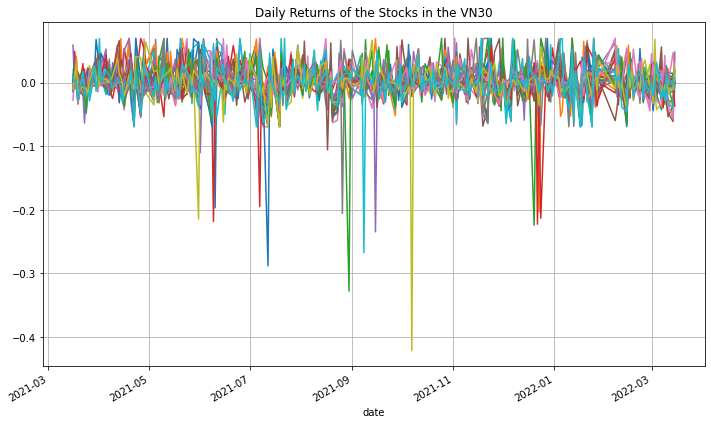

In [ ]:
profit.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the VN30')
plt.tight_layout()
plt.savefig('DRSVN30.png')

In [ ]:
from numpy.linalg import eigh


In [ ]:
# Khử Null 
profit=profit.fillna(0)

In [ ]:
profit_scale =  profit - profit.mean()

In [ ]:
cov_matrix=np.cov(profit_scale.T)
cov_matrix

array([[ 5.14004112e-04,  2.54365421e-04,  1.01656490e-04,
         2.75925846e-04,  1.01357155e-04,  8.69131700e-05,
         1.80568553e-04,  3.16695246e-04,  9.32111724e-05,
         7.58829350e-05,  3.50199899e-04,  1.11864999e-04,
         1.15570895e-04, -9.24658711e-06,  5.42704675e-05,
         9.18690592e-05,  1.31551209e-04,  9.67498222e-05,
         9.64373001e-07,  2.65396136e-04,  3.12804630e-04,
         2.79918321e-04,  2.95279239e-04,  1.60226430e-04,
         1.45992401e-04,  7.72978333e-05, -1.60030988e-05,
         1.52425083e-05,  1.99110559e-04,  1.24895196e-04],
       [ 2.54365421e-04,  5.89059612e-04,  1.59328026e-04,
         2.53528838e-04,  1.19902454e-04,  1.22985308e-04,
         1.98600824e-04,  3.14791407e-04,  1.42428384e-04,
         9.76937140e-05,  3.62518768e-04,  1.11729602e-04,
         1.06476408e-04,  9.90632588e-06,  1.04678548e-04,
         1.06900115e-04,  1.41682782e-04,  1.84155547e-04,
         1.86786166e-05,  3.11220542e-04,  3.10049032e-

In [ ]:
eigvals,eigvecs = eigh(cov_matrix)



In [ ]:
MyPC1=eigvecs[0]

In [ ]:
weights = abs(MyPC1)/sum(abs(MyPC1))
weights

array([0.02716544, 0.04081643, 0.01355337, 0.07439587, 0.0539    ,
       0.0133946 , 0.09513601, 0.04941597, 0.00606232, 0.01278266,
       0.00948751, 0.05015555, 0.01482955, 0.11336719, 0.08599393,
       0.01381727, 0.00486049, 0.03061583, 0.00867388, 0.03381484,
       0.04924779, 0.01217212, 0.03703716, 0.01468211, 0.0075047 ,
       0.01396751, 0.00364347, 0.01518459, 0.04556548, 0.04875637])

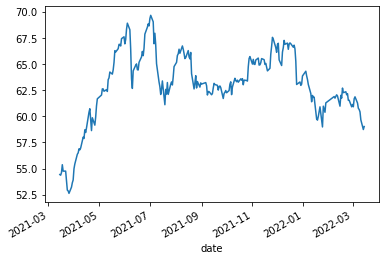

In [ ]:
(weights*closePrice).sum(1).plot()